# Student Performance Indicator

## Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best Model

### 1) Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as the Gender, Ethinicity, Parental level of education, Lunch and Test preperation course.

### 2) Data Collection

* Dataset source  - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
* This data consists of 8 columns and 1000 rows

### 2.1) Import Data and required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show top five data

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### shape of the Dataset

In [7]:
df.shape

(1000, 8)

### 2.2 Dataset Information

* genger : sex of the students - > (male/female)
* race/ethinicity : ethinicity if students - > (Group A,B,C,D,E)
* parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preperation course : complete or not complete before test
* math score
* reading score
* writing score

### 3) Data Checks to perform

* Check Missing values
* Check Duplicates
* Check Data types
* Check the number of unique values of each column
* Check Statistics of Data set
* Check various categories present in the different categorical column

### 3.1) Check Missing values 

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values

### 3.2) Check Duplicates

In [11]:
df.duplicated().sum()

0

#### There are no Duplicate values

### 3.3) Check data type

In [32]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Check the number of Unique values in each column 

In [33]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5) check the statistics of the Data set


In [34]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

* From above description of the Numerical data, all means are very close to each other - between 66 and 68.05.
* All standard deviation are also close - between 14.6 and 15.19
* While there is minnimum score of 0 for match, writing minimum is much higher = 10 and for reading it is 17

### 3.7) Exploring the Data

In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [36]:
print("Categories in 'gender' variable : ",end=' ')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable : ",end=' ')
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable : ",end=' ')
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable : ",end=' ')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable : ",end=' ')
print(df['test preparation course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [37]:
## defining numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
categorical_features = [feature for feature in df.columns if df[feature].dtype == '0']

## print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
We have 0 categorical features : []


### 3.8) Adding Columns for 'Total score' and 'Average'

In [43]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,229,76.333333


In [46]:
reading_full = df[df['reading score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()

print('Number of students with 100 marks in Maths : {}'.format(math_full))
print('Number of students with 100 marks in reading : {}'.format(reading_full))
print('Number of students with 100 marks in  writing : {}'.format(writing_full))


Number of students with 100 marks in Maths : 7
Number of students with 100 marks in reading : 17
Number of students with 100 marks in  writing : 14


In [48]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()

print('Number of students with less than 20 marks in Maths : {}'.format(math_less_20))
print('Number of students with less than 20 marks in reading : {}'.format(reading_less_20))
print('Number of students with less than 20 marks in  writing : {}'.format(writing_less_20))


Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in  writing : 3


#### Insights 

* From the above values we get students have performed the worst in Maths
* Best performance was in reading

## 4. Exploring Data ( Visualization )

### 4.1 Visualise average score distribution to make some conclusion

* Histogram 
* Kernel Distribution Function (KDE)

### 4.1.1 Histogram and KDE

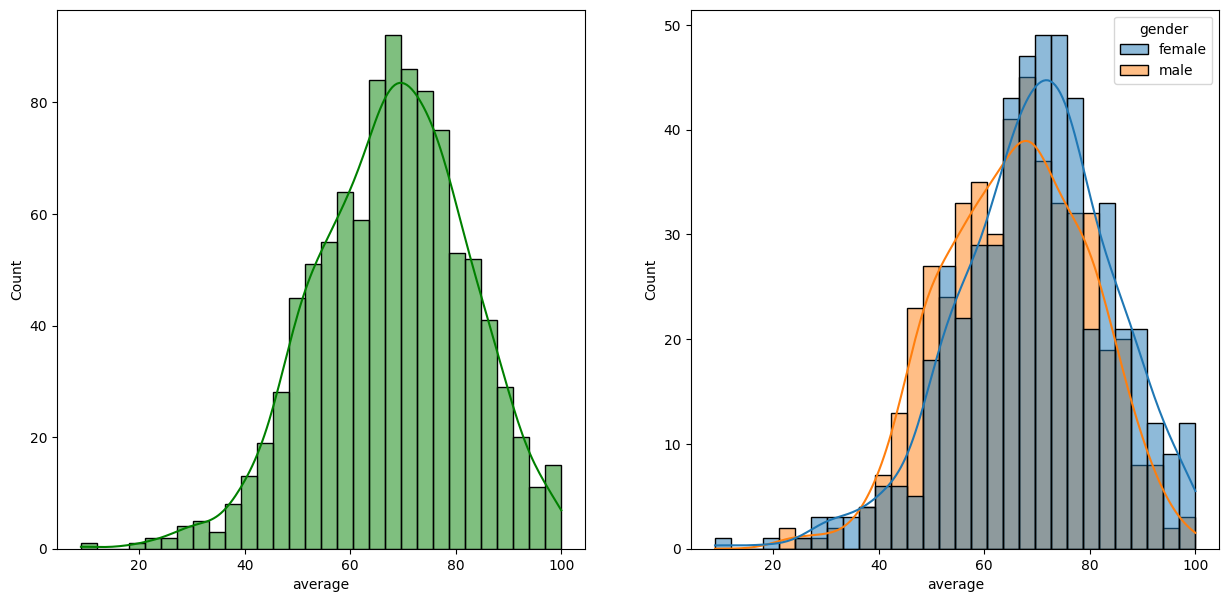

In [66]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',bins=30,kde=True,hue='gender')
plt.show()


#### Insights

* Female students tend to perform better than Male students.

<Axes: xlabel='average', ylabel='Count'>

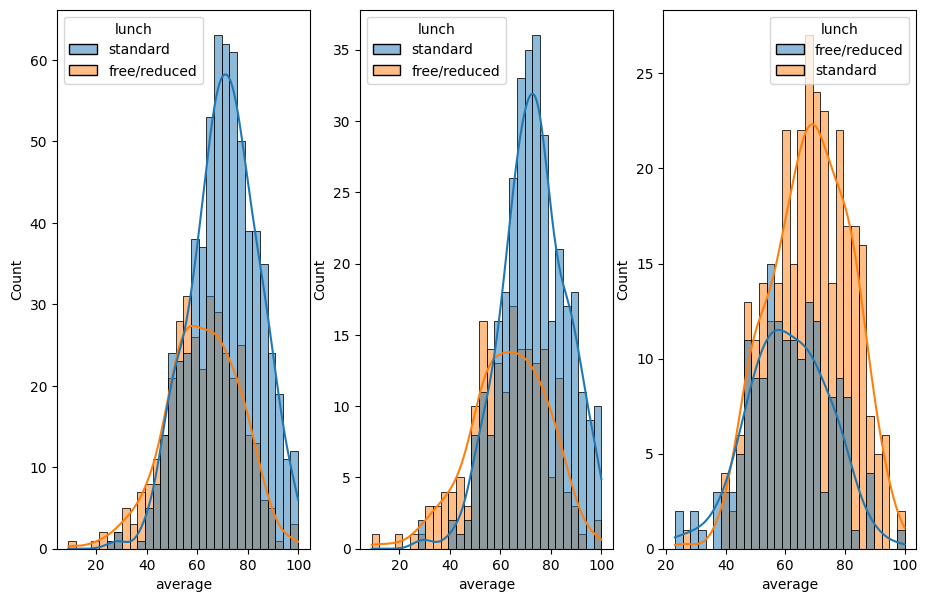

In [71]:
fig, axs = plt.subplots(1,3,figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df, x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'], x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'], x='average',bins=30,kde=True,hue='lunch')
# plt.show()


#### Insights

* Standard Lunch helps perform better in exams whether it is male or female student.

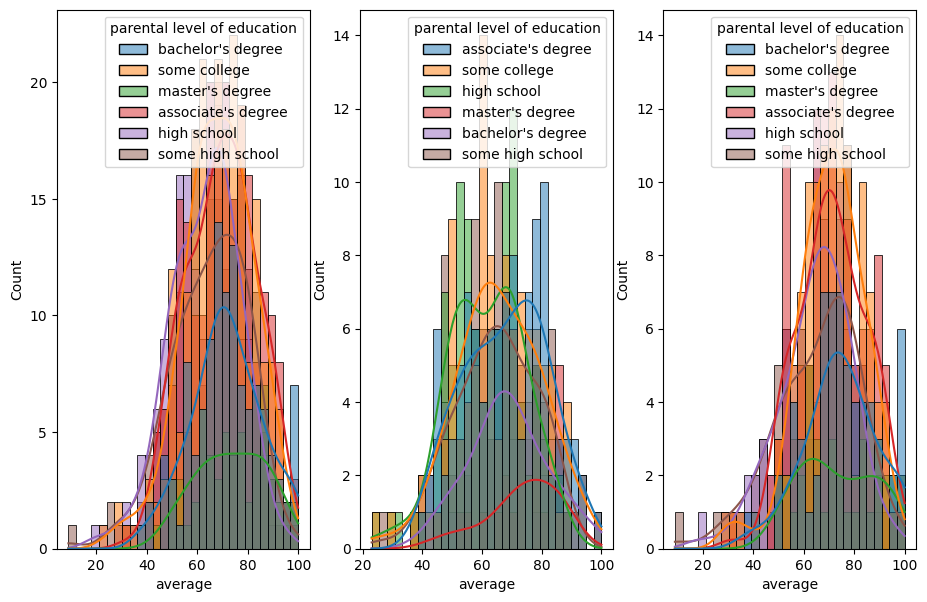

In [75]:
fig, axs = plt.subplots(1,3,figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df, x='average',bins=30,kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'], x='average',bins=30,kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'], x='average',bins=30,kde=True,hue='parental level of education')
plt.show()


#### Insights

* In general parent's education dont help student in exams.
* 2nd plot shows that parent's whose education is of associate's or master's degree, their male children are doing better in exams.
* 3rd plot shows that there is not effect of parents education on girl child performance in exams.

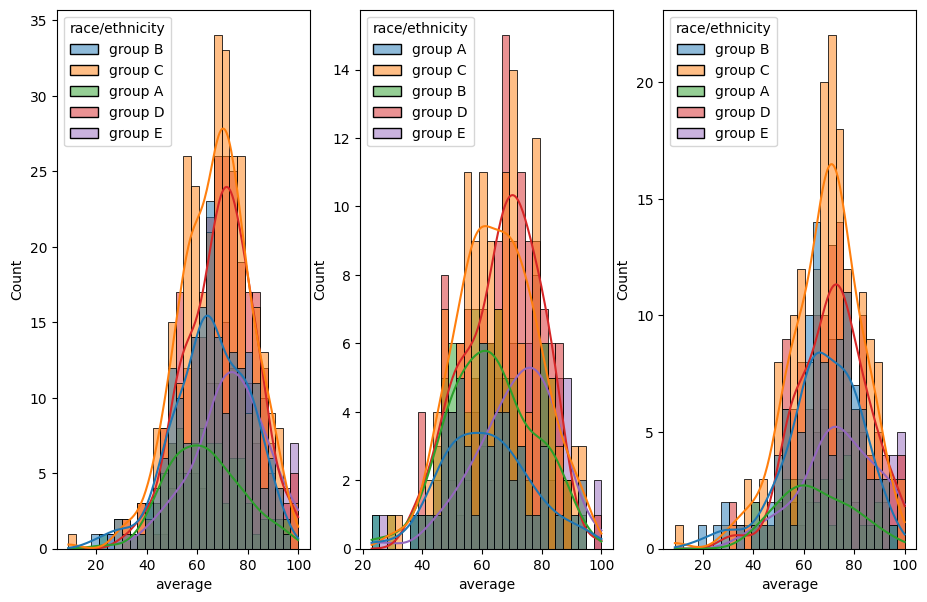

In [77]:
fig, axs = plt.subplots(1,3,figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df, x='average',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'], x='average',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'], x='average',bins=30,kde=True,hue='race/ethnicity')
plt.show()

#### Insights 

* Students of Group A and Group B tends to perform poorly in exam.
* Students of Group A and Group B tends to perform poorly in exam irrespective of wether it is male or female.

### 4.2 Maximum score of students in all three subjects